<!-- <figure>
        <img src="https://z-p3-scontent.fpnh18-1.fna.fbcdn.net/v/t39.30808-6/471556574_630031189358594_2122222651865019678_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeHsrx7Qr2HiNhmyAL2CARaGySZRkOflcw_JJlGQ5-VzDyghWShBffS7LcUEgG55H4poyI2scm0AwI5jCFvnloYz&_nc_ohc=oUa66d5s7L4Q7kNvgEQ-FLJ&_nc_oc=AdhPrIfKRCIMl7rrnvvF_B9o1mbyQrp7c6G77_uGnPbZiVTs78GIWPCyLb3GN7b8CoU&_nc_zt=23&_nc_ht=z-p3-scontent.fpnh18-1.fna&_nc_gid=Au41WJ3JvesZcfXpnhuJDpX&oh=00_AYDlMqBWmbD6X_8Z7om7GM2h84WbQOXmypXjqQFcP-wVjg&oe=6778111A" alt ="Audio Art" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;">
        <figcaption>
            Source: <a href="https://z-p3-scontent.fpnh18-1.fna.fbcdn.net/v/t39.30808-6/471556574_630031189358594_2122222651865019678_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeHsrx7Qr2HiNhmyAL2CARaGySZRkOflcw_JJlGQ5-VzDyghWShBffS7LcUEgG55H4poyI2scm0AwI5jCFvnloYz&_nc_ohc=oUa66d5s7L4Q7kNvgEQ-FLJ&_nc_oc=AdhPrIfKRCIMl7rrnvvF_B9o1mbyQrp7c6G77_uGnPbZiVTs78GIWPCyLb3GN7b8CoU&_nc_zt=23&_nc_ht=z-p3-scontent.fpnh18-1.fna&_nc_gid=Au41WJ3JvesZcfXpnhuJDpX&oh=00_AYDlMqBWmbD6X_8Z7om7GM2h84WbQOXmypXjqQFcP-wVjg&oe=6778111A">[See Picture]</a>
        </figcaption>
</figure> -->

# **Type 2 Diabetes classification**

In the project, we try to predict if a patient has **type 2 diabetes** based on some features which are used as input information.

**[Dataset for Type 2 Diabetes](https://data.mendeley.com/datasets/7m7555vgrn/1)** provides comprehensive information on **5,437 patients**, including **14 independent** attributes such as demographics, clinical parameters, and medical history.

**<u>Key features:</u>**

- `age`

- `gender`

- `pulse rate`

- `blood pressure` (systolic and diastolic)

- `glucose level`

- `BMI`

- family history of diabetes and related conditions like `hypertension` and `cardiovascular` disease.

The dataset is labeled with a **binary outcome** indicating whether each patient has diabetes

**Import Libraries**

In [1]:
import pandas as pd # pandas for data analysis
import numpy as np  # numpy for complex numerical computation
import matplotlib.pyplot as plt # for initial plot
import seaborn as sns # built above matplotlib for making fancy plot
sns.set_theme() # set default for graphical plots
from IPython.display import HTML

import warnings # compress error warnings

# compress the errors
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings
    # Your code that may generate warnings goes here

print('Tools Set Up')

Tools Set Up


**Load the Data**

In [2]:
df_raw = pd.read_csv('../selected_dataset/DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction/Diabetes_Final_Data_V2.csv')
df_raw.shape

(5437, 15)

**Copy Raw Data**

In [3]:
df = df_raw.copy()
df.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female          66          110            73     5.88    1.65   
1   35  Female          60          125            68     5.71    1.47   
2   62  Female          57          127            74     6.85    1.52   
3   73    Male          55          193           112     6.28    1.63   
4   68  Female          71          150            81     5.71    1.42   

   weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0    70.2  25.75                0             0                    0   
1    42.5  19.58                0             0                    0   
2    47.0  20.24                0             0                    0   
3    57.4  21.72                0             0                    0   
4    36.0  17.79                0             0                    0   

   cardiovascular_disease  stroke diabetic  
0                       0       0       No  
1                       0       0       No  
2                       0       0       No  
3                       0       0       No  
4                       0       0       No

In [4]:
df['systolic_bp']

0       110
1       125
2       127
3       193
4       150
       ... 
5432    164
5433    141
5434    134
5435    139
5436    134
Name: systolic_bp, Length: 5437, dtype: int64

## **I. Exploratory Data Analysis**

## **1.1. Data Checking**

### **1.1.1. Check Variables and Data Type**

**Check Columns**

In [5]:
# Convert columns to HTML and display
html_columns = df.columns.to_frame().to_html(index=False, header=False)
display(HTML(html_columns))

**Note:** Above are the columns of the data.

**Data Type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

**Note:** The data's columns are mixed of `numerical date`, `numerical categories`, and even `string categories`

### **1.1.1. Check Missing Data**

In [7]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

**Note:** No missing data since it is already cleaned

### **1.1.2. Check Diplicated Data**

In [8]:
df.duplicated().sum()

0

**Note:** No Duplicated Data as per the same reason

## **1.2. Summury Statistcs**

In [9]:
df.describe()

age   pulse_rate  systolic_bp  diastolic_bp      glucose  \
count  5437.000000  5437.000000  5437.000000   5437.000000  5437.000000   
mean     45.533750    76.768990   133.859849     82.064742     7.540682   
std      14.321155    12.290076    22.293015     12.489593     2.923080   
min       8.000000     5.000000    62.000000     45.000000     0.000000   
25%      35.000000    69.000000   119.000000     73.000000     6.000000   
50%      45.000000    76.000000   130.000000     81.000000     6.920000   
75%      55.000000    84.000000   147.000000     90.000000     8.120000   
max     112.000000   133.000000   231.000000    119.000000    33.460000   

            height       weight          bmi  family_diabetes  hypertensive  \
count  5437.000000  5437.000000  5437.000000      5437.000000   5437.000000   
mean      1.548571    53.626816    22.472301         0.037337      0.109803   
std       0.080955    10.091550     8.778764         0.189603      0.312673   
min       0.360000     3.000000     1.220000         0.000000      0.000000   
25%       1.520000    46.700000    19.630000         0.000000      0.000000   
50%       1.550000    53.000000    21.870000         0.000000      0.000000   
75%       1.600000    59.900000    24.490000         0.000000      0.000000   
max       1.960000   100.700000   574.130000         1.000000      1.000000   

       family_hypertension  cardiovascular_disease       stroke  
count          5437.000000             5437.000000  5437.000000  
mean              0.039544                0.011587     0.003678  
std               0.194903                0.107029     0.060545  
min               0.000000                0.000000     0.000000  
25%               0.000000                0.000000     0.000000  
50%               0.000000                0.000000     0.000000  
75%               0.000000                0.000000     0.000000  
max               1.000000                1.000000     1.000000

**Note:** Based on the statistics sammary, `bmi` is quite *right-skewed* among all the numerical data

## **1.3. Data Visualization**

In [10]:
count_in_diabetes = df['diabetic'].value_counts()
print(count_in_diabetes)

diabetic
No     5093
Yes     344
Name: count, dtype: int64


**Count Plots Diabetes Diagnos**

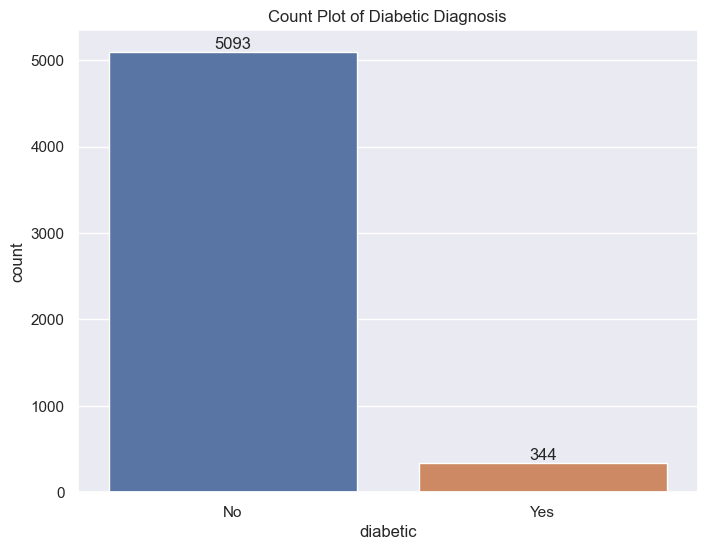

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", data=df, hue='diabetic')
plt.title("Count Plot of Diabetic Diagnosis")

def put_numbers_on_bar():
    ax = plt.gca()
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')


put_numbers_on_bar()

**Note:**

In here, are numbers of those who are Diabetic and those who are NOT, relative to all the records

**Donut Plot Diabetes Diagnos**

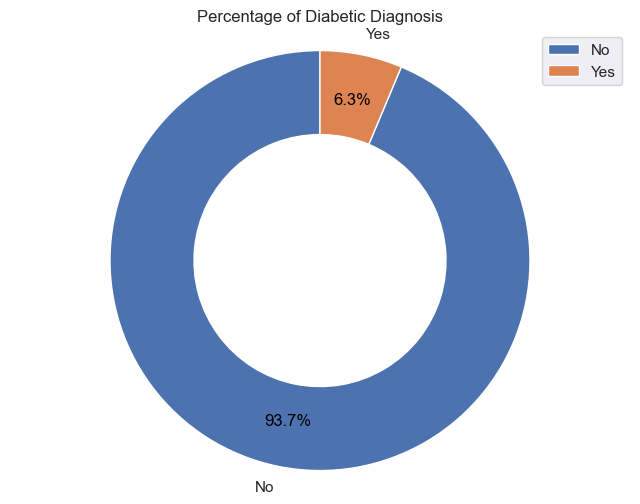

In [12]:
# get data for donut plot
labels = count_in_diabetes.index
sizes = count_in_diabetes.values

plt.figure(figsize=(8, 6))

# Create the donut chart  
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%',   
                                    startangle=90, wedgeprops=dict(width=0.4))  

# Set the position of the text annotations  
for text in autotexts:  
    text.set_color('black')  # Change the text color for better visibility  
    text.set_fontsize(12)  # Adjust font size  
    text.set_position((text.get_position()[0] * 1.3, text.get_position()[1] * 1.3))  

# Equal aspect ratio ensures that pie is drawn as a circle  
plt.legend()  
plt.title("Percentage of Diabetic Diagnosis")  
plt.axis('equal')  
plt.show()

**Note:** 

In here, i'm trying to illustrate the percentage of those who are Diabetic and those who are NOT relatively to all the records

The classes are inbalanced; let's save it for later discussion in the next section of *Model Contructions*

**Diabetic diagnos by `Gender`**

In [13]:
# print diabetes and nonp
diabetic_male = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Male')].shape[0]
diabetic_female = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Female')].shape[0]

non_diabetic_male = df[(df['diabetic'] == 'No') & (df['gender'] == 'Male')].shape[0]
non_diabetic_female = df[(df['diabetic'] == 'No') & (df['gender'] == 'Female')].shape[0]


df_diabetes_gender = pd.DataFrame({
    'Gender' : ['male', 'female'],
    'Non-diabetic' : [non_diabetic_male, non_diabetic_female],
    'Diabetic' : [diabetic_male, diabetic_female],
})
df_diabetes_gender.set_index('Gender', inplace=True)

df_diabetes_gender

# diabetic_male

Non-diabetic  Diabetic
Gender                        
male            1462       116
female          3631       228

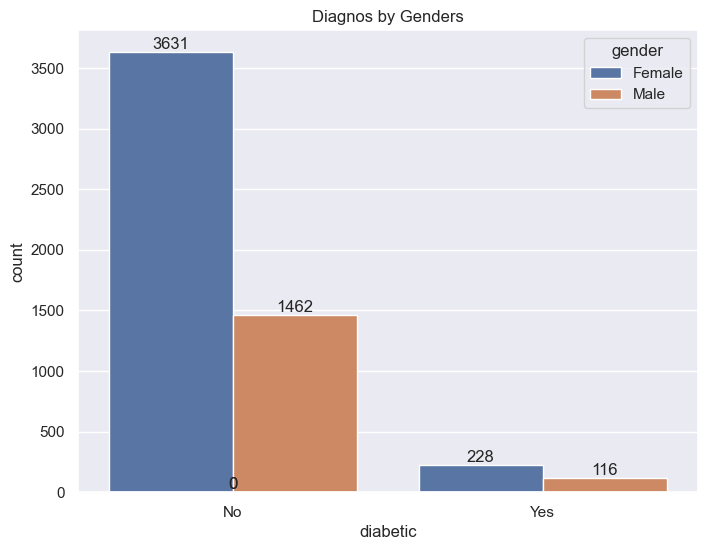

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", hue="gender", data=df)
plt.title("Diagnos by Genders")

put_numbers_on_bar()

**Note:**

From the plot, we can say that men are less likely to have DIABETES than women. 

**Histgram of Numerical Data**

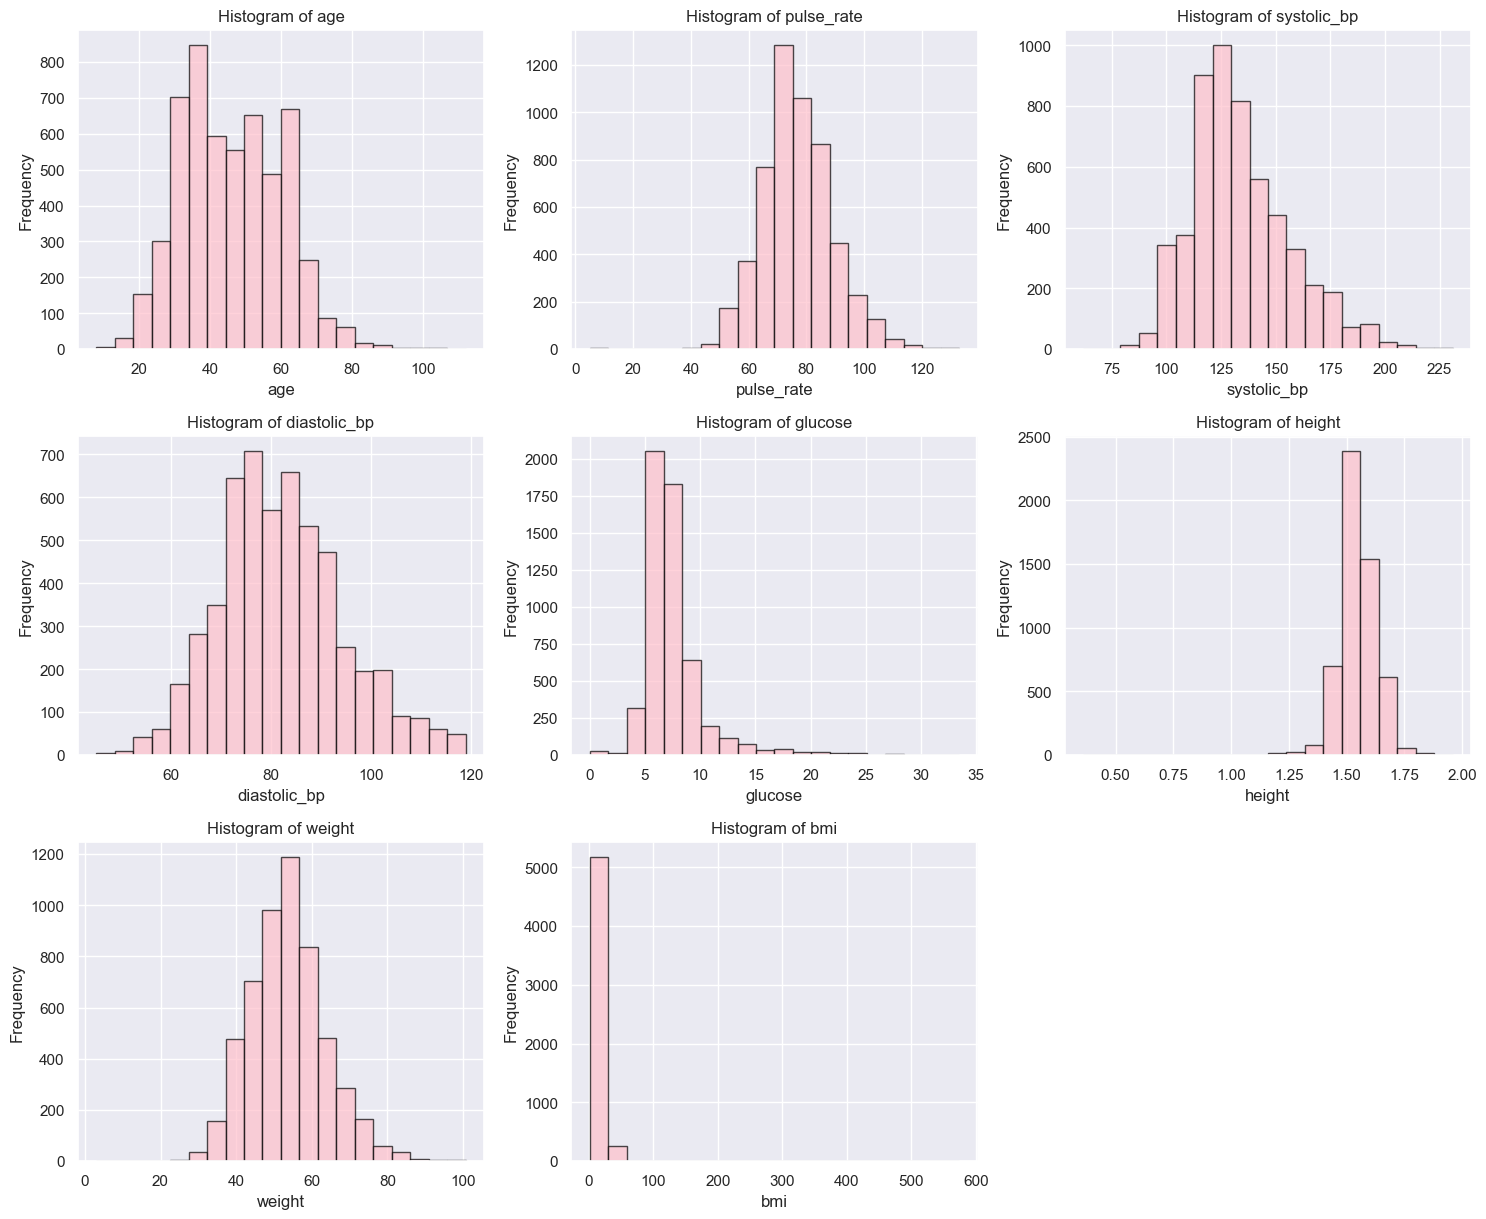

In [15]:
# columns of data we wanna plot histogram
numerical_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height', 'weight', 'bmi']

# function for numerical histogram plots
def plot_numerical_histogram(df: pd.DataFrame, cols, bins=20) -> None:
    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 2) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a histogram
    for i, column in enumerate(cols):
        axes[i].hist(df[column], bins=bins, color="pink", alpha=0.7, edgecolor="black")
        axes[i].set_title(f"Histogram of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_numerical_histogram(df, numerical_columns)

**Note:** As already said, the `bmi` is right-skewed

**Plot histgram of `BMI`**

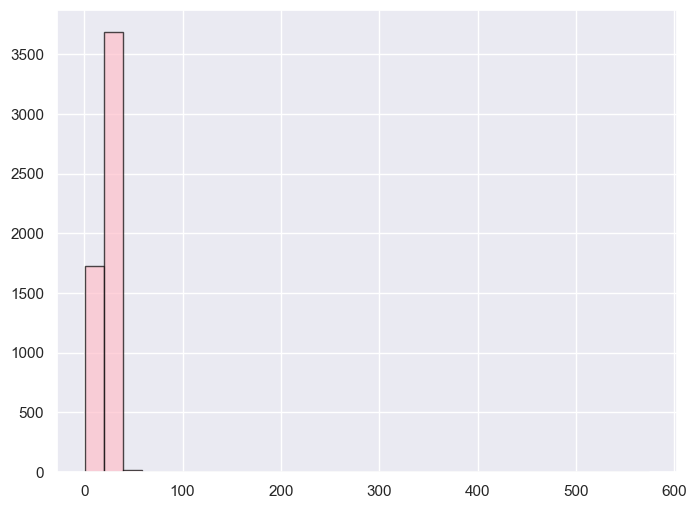

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=30, color="pink", alpha=0.7, edgecolor="black")
plt.show()

## **1.3.1. Data Trasformation**

**Label Encoding**

Because machine knows only numbers, we thus need to represent all string data with some sorts of arbitrary numbers

Label `Gender`: `Male` : 0, `Female` : 1

Label: `Diabetic`: `No` : 0,  `Yes` : 1

In [17]:
# label tthe gender column
gender_label_mapping = {
    'Female' : 0,
    'Male'   : 1,
}
df['gender'] = df['gender'].map(gender_label_mapping)

# label tthe target column
diabetic_label_mapping = {
    'Yes' : 1,
    'No'  : 0,
}
df['diabetic'] = df['diabetic'].map(diabetic_label_mapping)

df.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42       0          66          110            73     5.88    1.65   
1   35       0          60          125            68     5.71    1.47   
2   62       0          57          127            74     6.85    1.52   
3   73       1          55          193           112     6.28    1.63   
4   68       0          71          150            81     5.71    1.42   

   weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0    70.2  25.75                0             0                    0   
1    42.5  19.58                0             0                    0   
2    47.0  20.24                0             0                    0   
3    57.4  21.72                0             0                    0   
4    36.0  17.79                0             0                    0   

   cardiovascular_disease  stroke  diabetic  
0                       0       0         0  
1                       0       0         0  
2                       0       0         0  
3                       0       0         0  
4                       0       0         0

## **1.3.2. Drop Unneccessary Columns and Clear Outlier**

**Drop Unnecessary Columns**

**Note**

Body mass index (BMI) is a value derived from the mass (weight) and height of a person ([Wikipedia](https://en.wikipedia.org/wiki/Body_mass_index#:~:text=The%20BMI%20is%20a%20convenient,obese%20(30%20or%20more))). Thus, technically, BMI alone can discribe of the two varibles.

$$bmi = \frac{weight}{height^2}$$

By that, dropping `height` and `weight` is recommended in terms of *Dimensional Reduction* or *Redundancy Reduction*

In [18]:
df = df.drop(['height', 'weight'], axis=1)
df  # it is the original data without height and weight columns

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose    bmi  \
0      42       0          66          110            73     5.88  25.75   
1      35       0          60          125            68     5.71  19.58   
2      62       0          57          127            74     6.85  20.24   
3      73       1          55          193           112     6.28  21.72   
4      68       0          71          150            81     5.71  17.79   
...   ...     ...         ...          ...           ...      ...    ...   
5432   74       1          83          164            89     6.47  24.99   
5433   75       1          67          141           104     8.31  22.75   
5434   40       0          67          134           114     7.61  30.72   
5435   36       0          62          139            80     4.90  17.87   
5436   26       0          80          134            93     5.15  30.92   

      family_diabetes  hypertensive  family_hypertension  \
0                   0             0                    0   
1                   0             0                    0   
2                   0             0                    0   
3                   0             0                    0   
4                   0             0                    0   
...               ...           ...                  ...   
5432                0             1                    0   
5433                0             0                    0   
5434                0             1                    0   
5435                0             0                    0   
5436                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
0                          0       0         0  
1                          0       0         0  
2                          0       0         0  
3                          0       0         0  
4                          0       0         0  
...                      ...     ...       ...  
5432                       1       0         0  
5433                       0       0         1  
5434                       0       1         0  
5435                       0       0         0  
5436                       0       0         0  

[5437 rows x 13 columns]

**Numerical Features**

Normally, we often check outliers of only `numerical data`

In [19]:
# numerical columns
numerical_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

**Box plots**

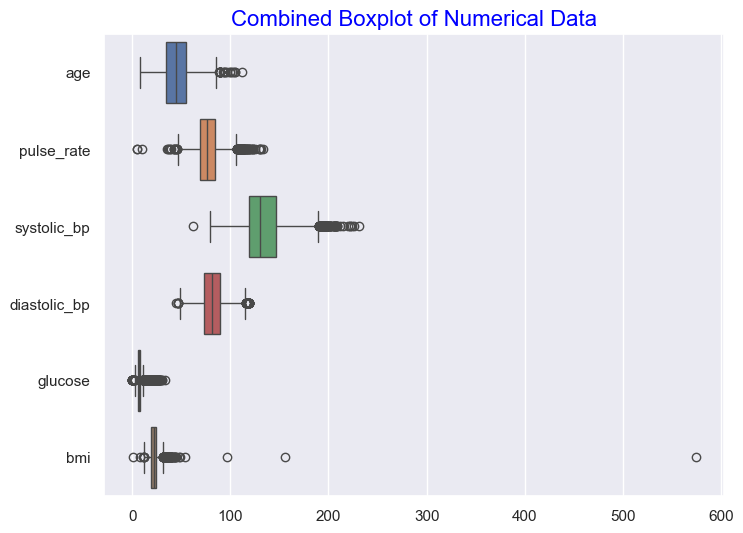

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(df[numerical_columns], orient='h')
plt.title("Combined Boxplot of Numerical Data", fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

**Scatter Plots**

In [21]:
# function to plot scatter plot
def plot_scatter_with_target_hue_vertical(df: pd.DataFrame, cols: list, target: str) -> None:
    num_columns = len(cols)
    rows = (num_columns // 2) + (num_columns % 2 > 0)  # Arrange in 2 columns

    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot each numerical column against the target
    for i, column in enumerate(cols):
        sns.scatterplot(data=df, x=target, y=column, hue=target, ax=axes[i])
        axes[i].set_title(f"Scatter plot of {target} vs {column}")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.show()

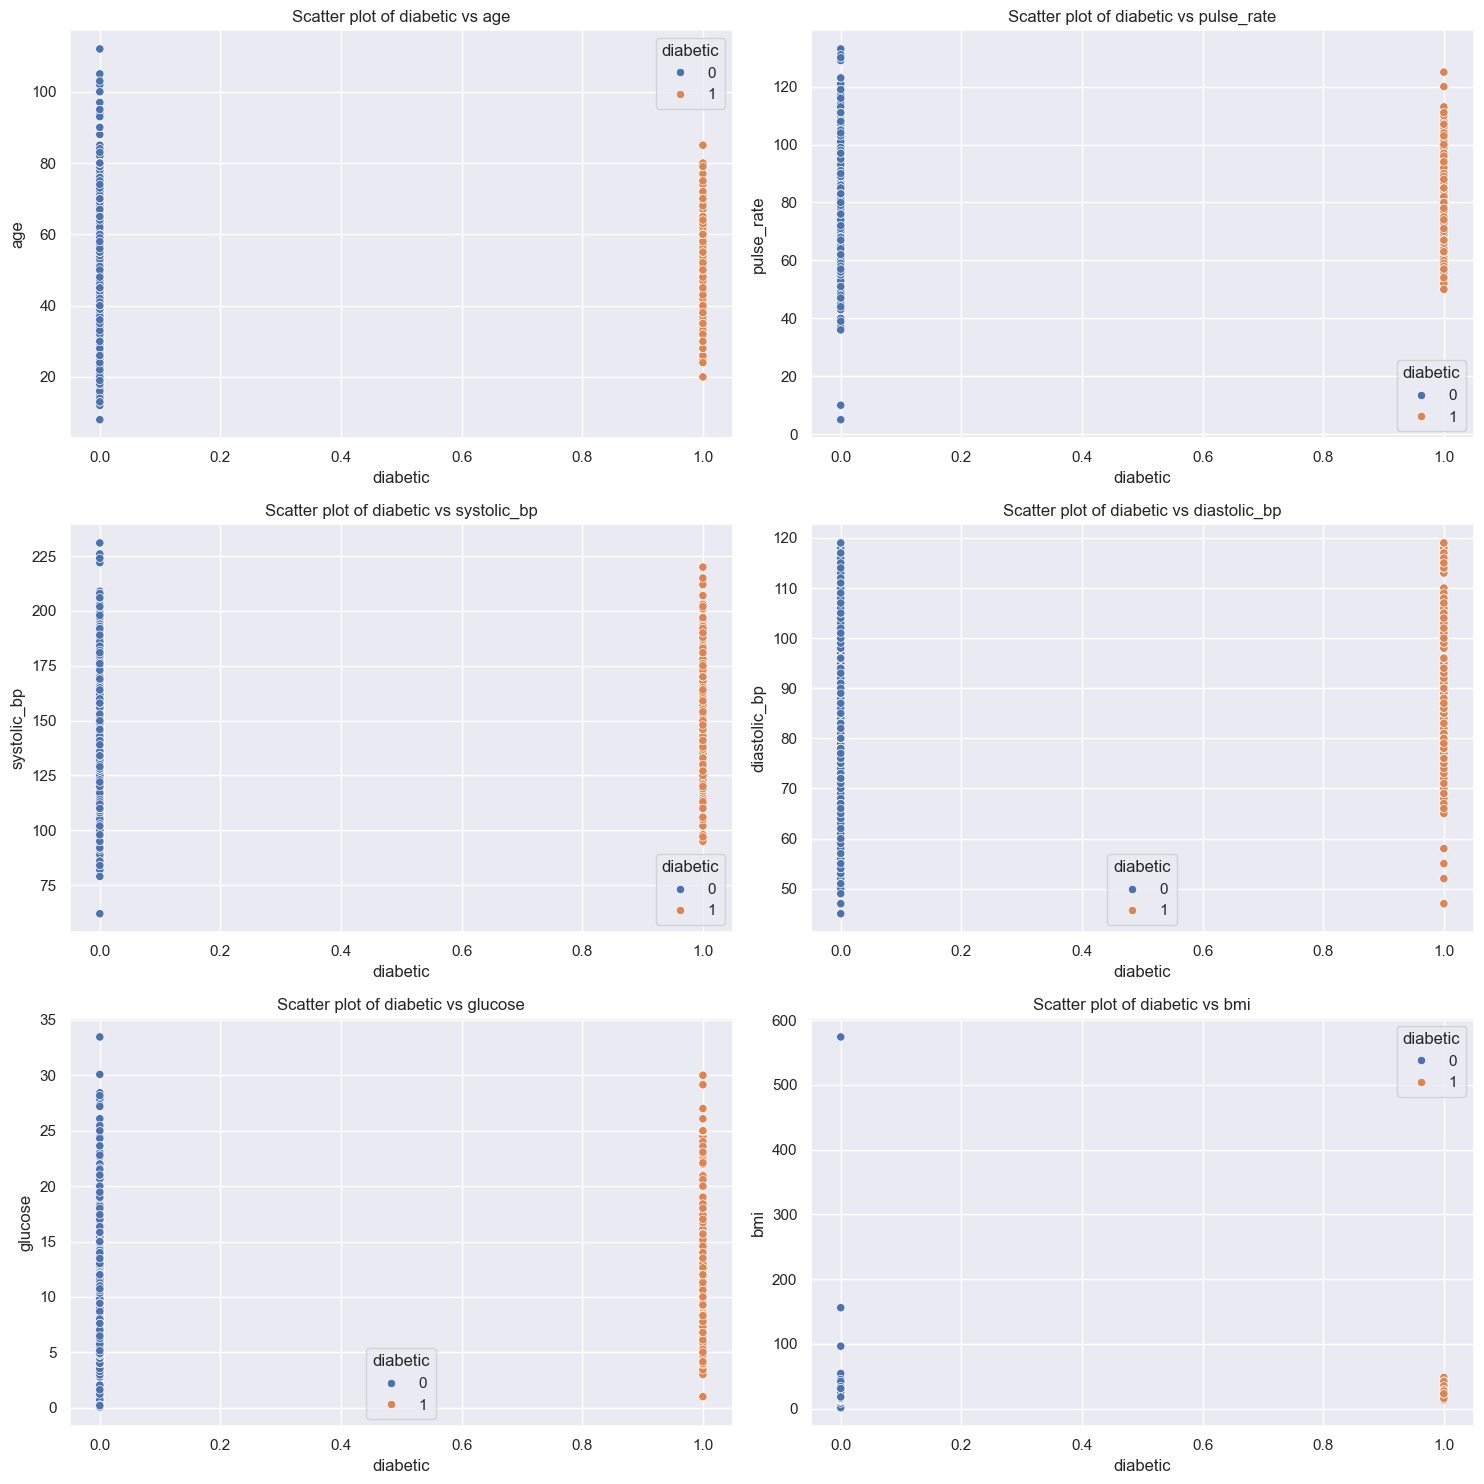

In [22]:
plot_scatter_with_target_hue_vertical(df, numerical_columns, 'diabetic')

**Pairplot of Mumerical Data**

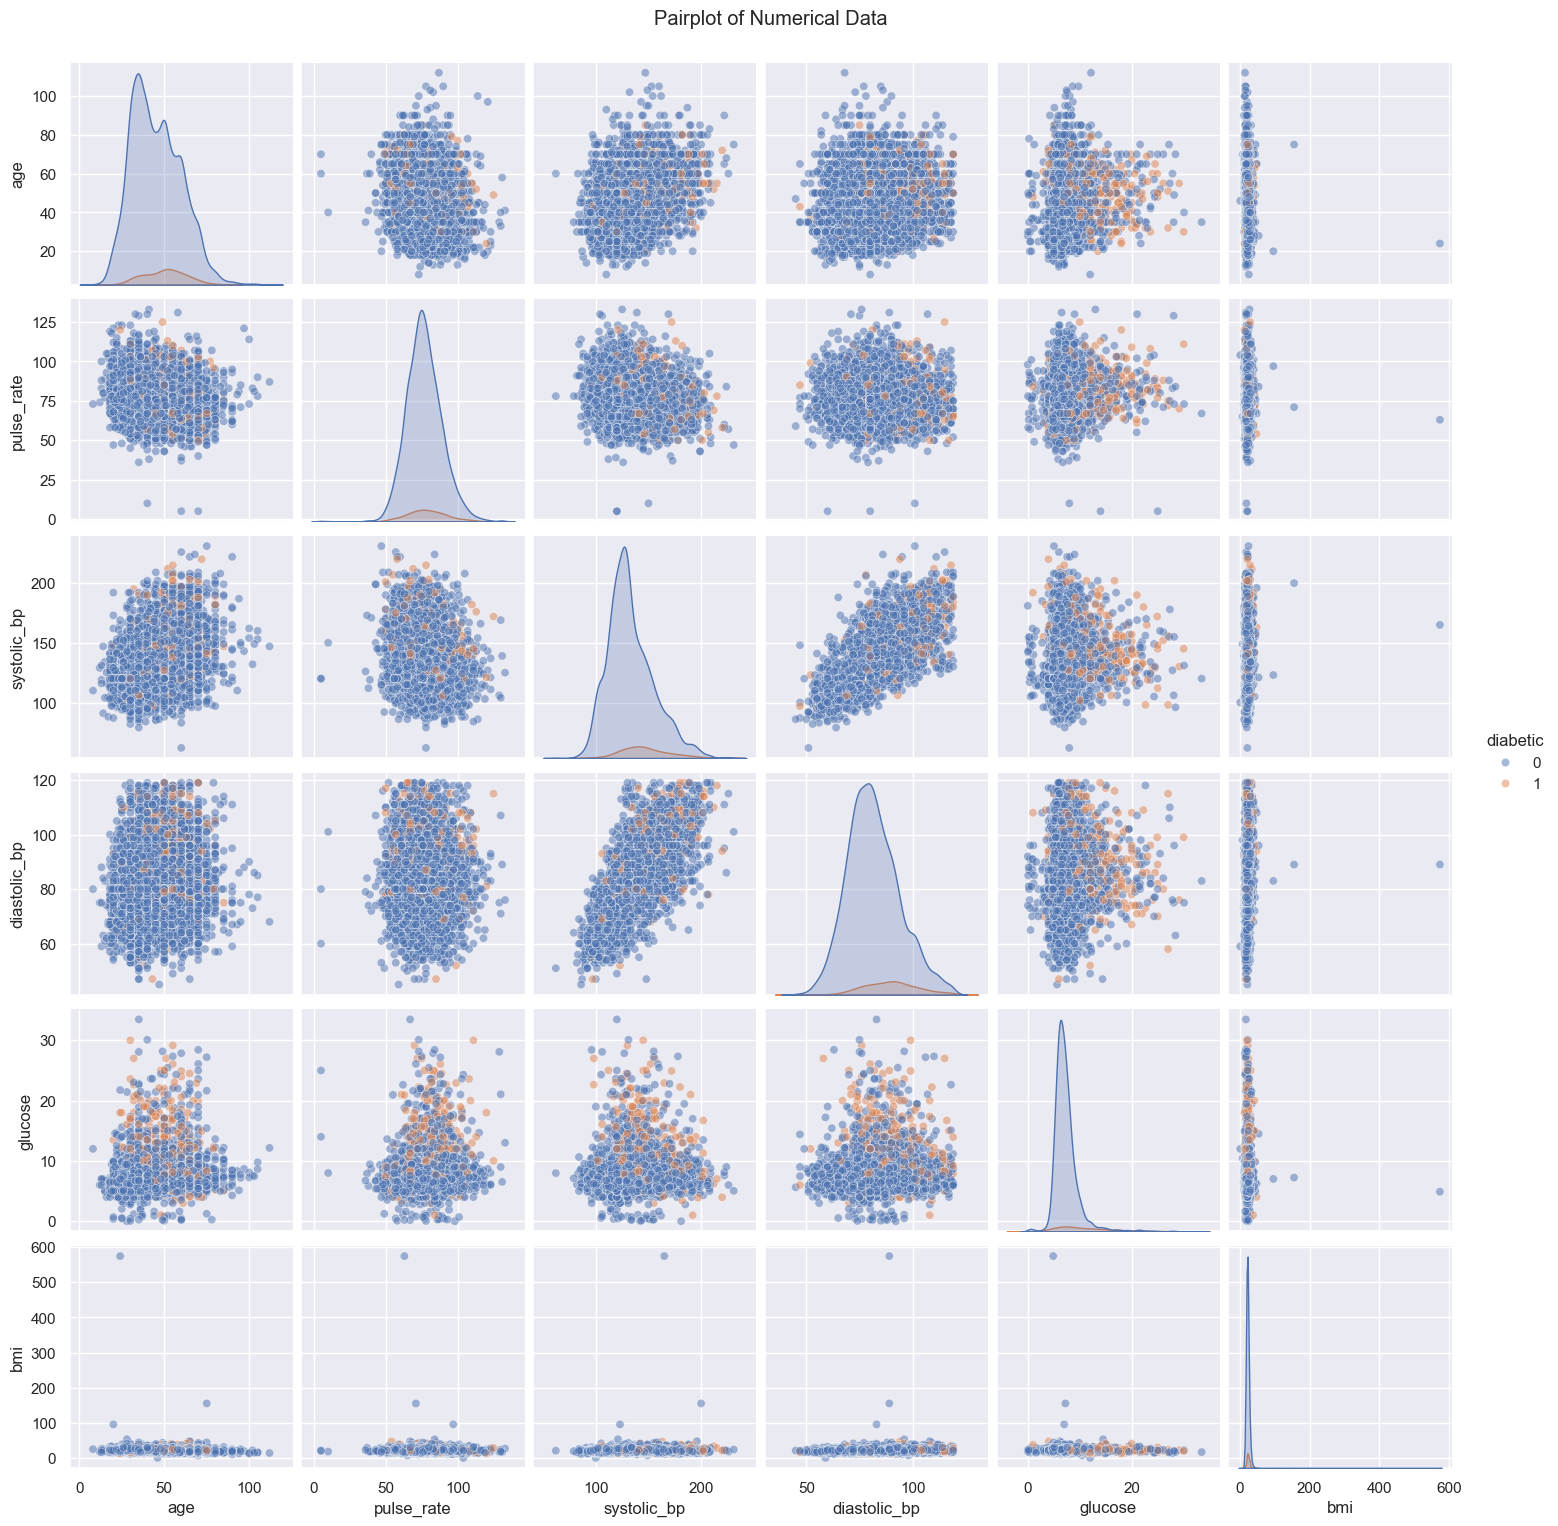

In [23]:
# Plot pairplot of numerical data
sns.pairplot(df[['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'diabetic']], diag_kind='kde', plot_kws={"alpha": 0.5}, hue='diabetic')
plt.suptitle("Pairplot of Numerical Data", y=1.02)
plt.show()

**Boxplots**

In [24]:
def plot_numerical_boxplot(df: pd.DataFrame, cols) -> None :

    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a boxplot
    for i, column in enumerate(cols):
        sns.boxplot(data=df[column], ax=axes[i], color="skyblue", orient="h")
        axes[i].set_title(f"Boxplot of {column}")
        axes[i].set_xlabel(column)
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


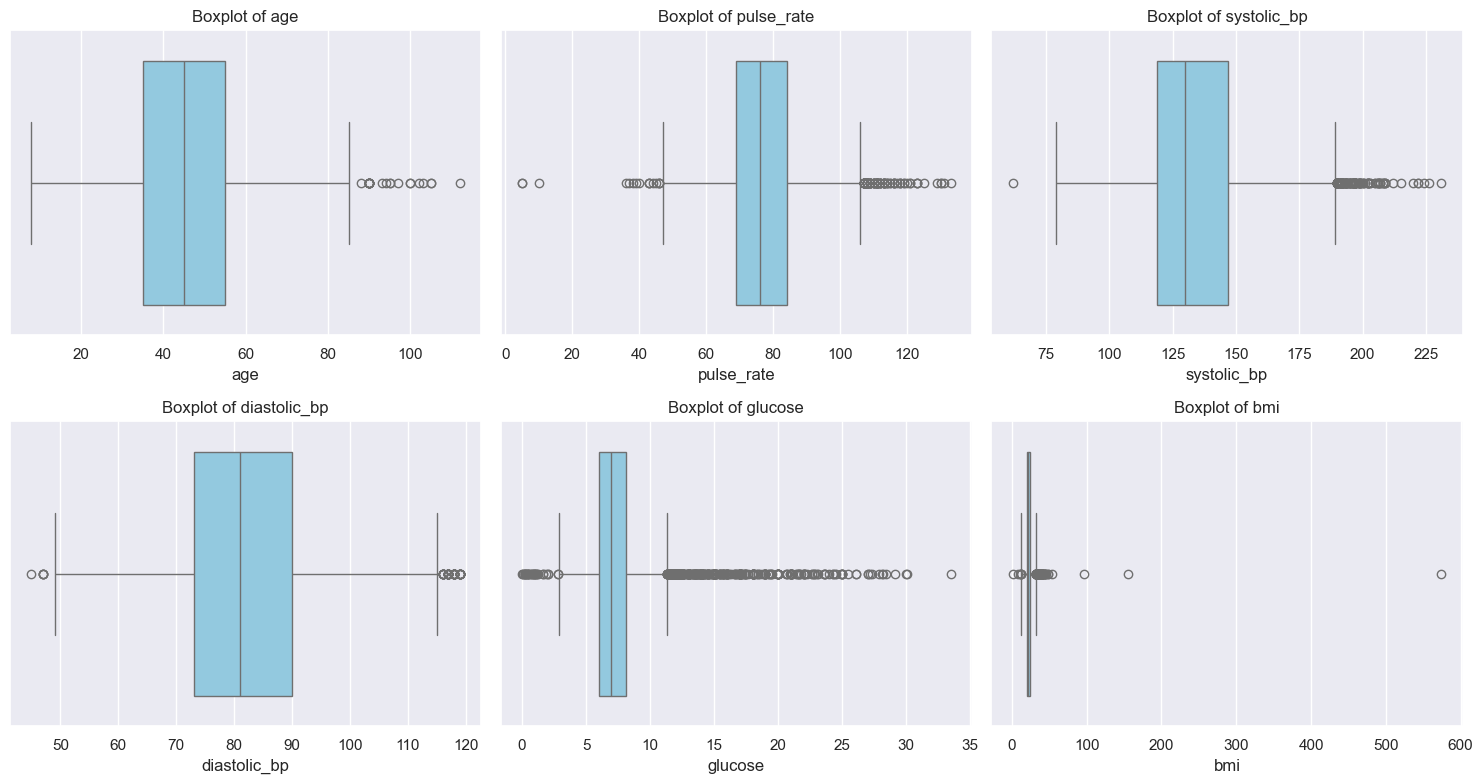

In [25]:
plot_numerical_boxplot(df, numerical_columns)

**Clear Outliers**

In [26]:
# define function to clear outliers given one column
def clear_outliers_iqr(df: pd.DataFrame, column:str) -> pd.DataFrame:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    return df


# define function to clear outliers given multiple columns
def clear_outliers_iqr_multiple(df: pd.DataFrame, cols:list) -> pd.DataFrame:
    for col in cols:
        df = clear_outliers_iqr(df, col)
    return df


# note: the below funtion will remove the outliers only in the numerical columns;
# thus, it will not affect the target column and cattegorical columns

**Clear by Qunatiles**

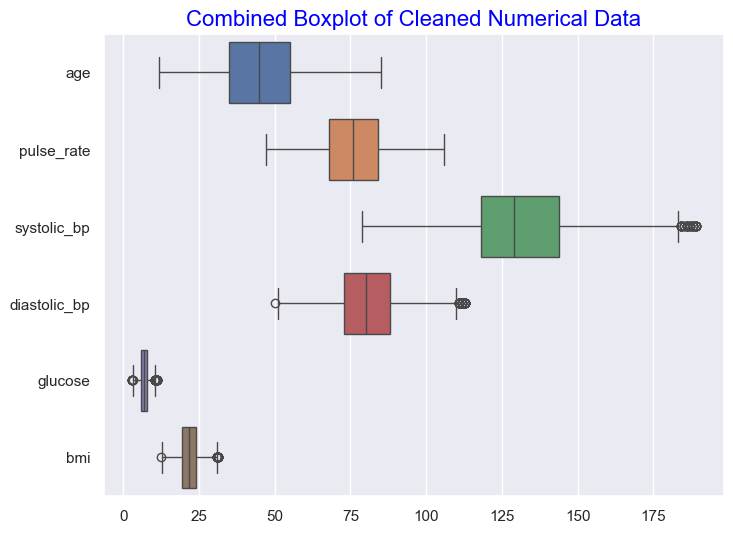

In [27]:
# new df after clearing outliers
df_clear_outlier = clear_outliers_iqr_multiple(df, numerical_columns)[numerical_columns].copy()
# df = clear_outliers_iqr_multiple(df, cols)

# plot the boxplot of the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clear_outlier, orient='h')
plt.title("Combined Boxplot of Cleaned Numerical Data", fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

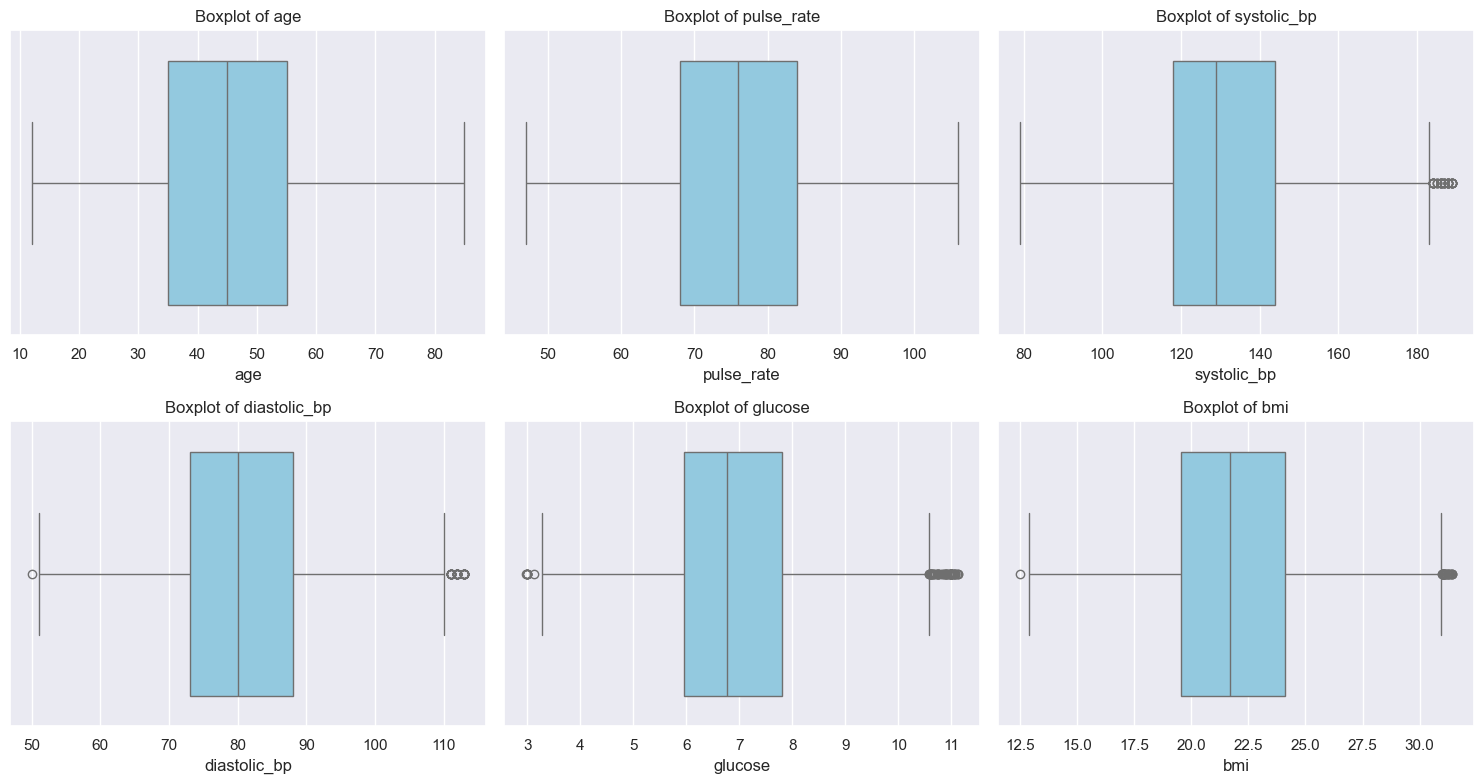

In [28]:
plot_numerical_boxplot(df_clear_outlier, numerical_columns)

**Plot box plots and violin plots**

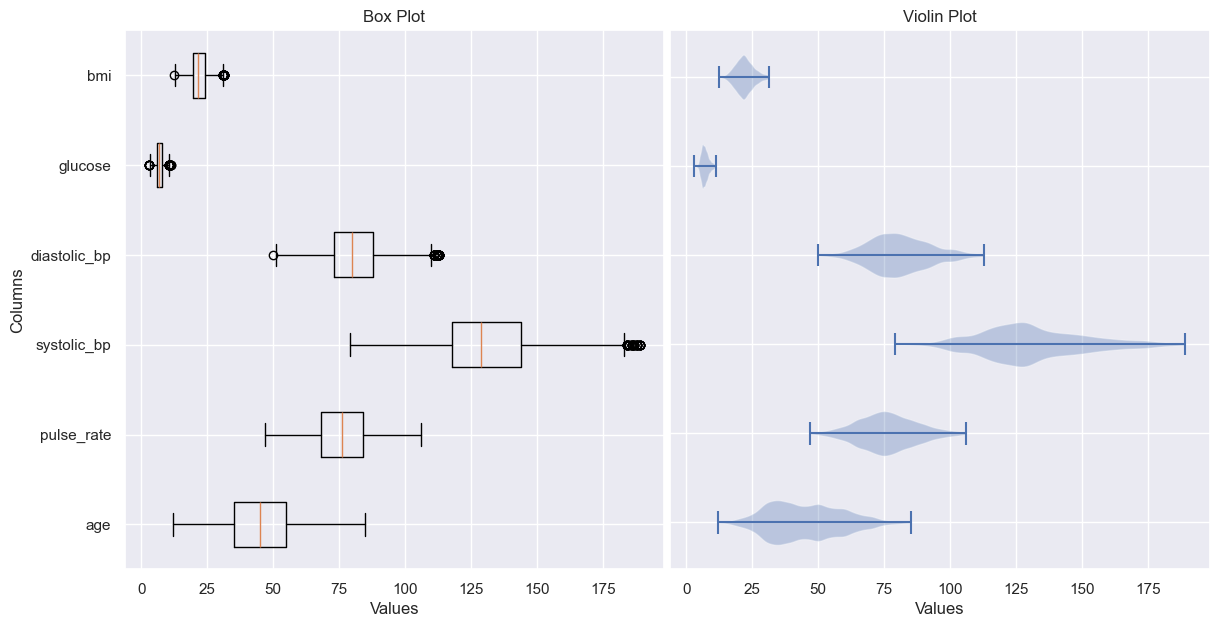

In [29]:
# Create subplots of distribution: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Box Plot on the first subplot
axs[0].boxplot(df_clear_outlier, vert=False)
axs[0].set_title('Box Plot')
axs[0].set_ylabel('Columns')
axs[0].set_xlabel('Values')
axs[0].set_yticklabels(numerical_columns)

# Violin Plot on the second subplot
axs[1].violinplot(df_clear_outlier, vert=False)
axs[1].set_title('Violin Plot')
axs[1].set_xlabel('Values')
axs[1].set_yticklabels([])

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=.01)
# plt.tight_layout()

# Show the plots
plt.show()

In [30]:
# new df after clearing outliers
df_1 = df_clear_outlier.copy()

# Save the cleaned dataframe to a CSV file
# df_1.to_csv(r'D:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Cleaned_Datasets\Diabetes_Final_Data_Cleaned_v2.csv', index=False)

df_1

age  pulse_rate  systolic_bp  diastolic_bp  glucose    bmi
0      42          66          110            73     5.88  25.75
1      35          60          125            68     5.71  19.58
2      62          57          127            74     6.85  20.24
4      68          71          150            81     5.71  17.79
5      40          48          131            73     7.22  23.42
...   ...         ...          ...           ...      ...    ...
5431   70          68          146            77     9.42  18.35
5432   74          83          164            89     6.47  24.99
5433   75          67          141           104     8.31  22.75
5435   36          62          139            80     4.90  17.87
5436   26          80          134            93     5.15  30.92

[4647 rows x 6 columns]

In [31]:
# sns.pairplot(df[['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'diabetic']], hue='diabetic')
# plt.show()

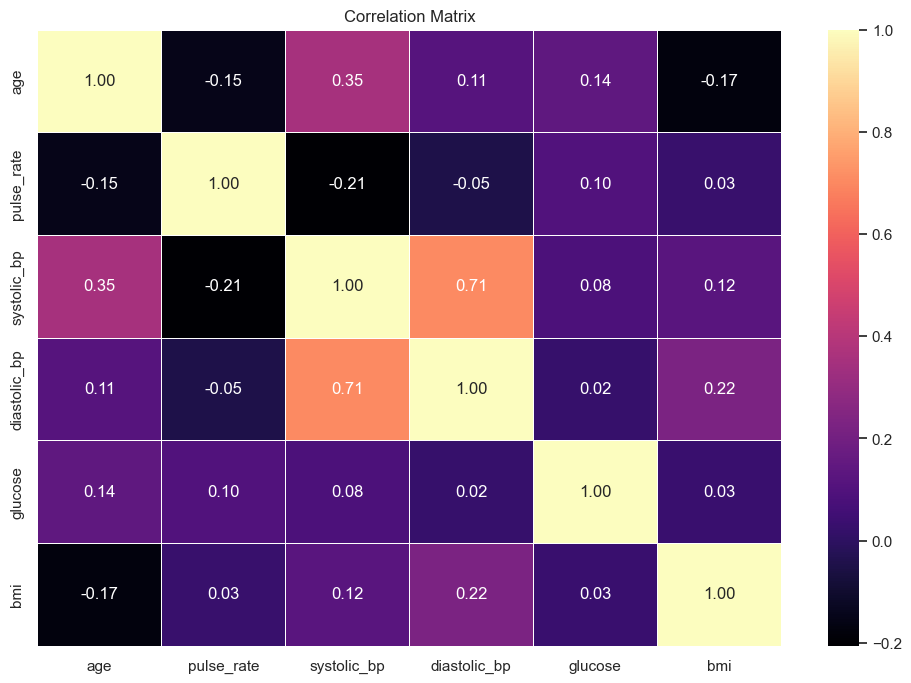

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Note:**

The CORRELATION of the features and target seem to be kinda poor..

In [33]:
import pandas as pd

df_2 = pd.read_csv(r'D:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Cleaned_Datasets\Diabetes_Final_Data_Cleaned_v3.csv')

df_2.head()

age  gender  systolic_bp  diastolic_bp  glucose    bmi  family_diabetes  \
0   42       0          110            73     5.88  25.75                0   
1   35       0          125            68     5.71  19.58                0   
2   62       0          127            74     6.85  20.24                0   
3   68       0          150            81     5.71  17.79                0   
4   40       1          131            73     7.22  23.42                0   

   hypertensive  diabetic  
0             0         0  
1             0         0  
2             0         0  
3             0         0  
4             0         0

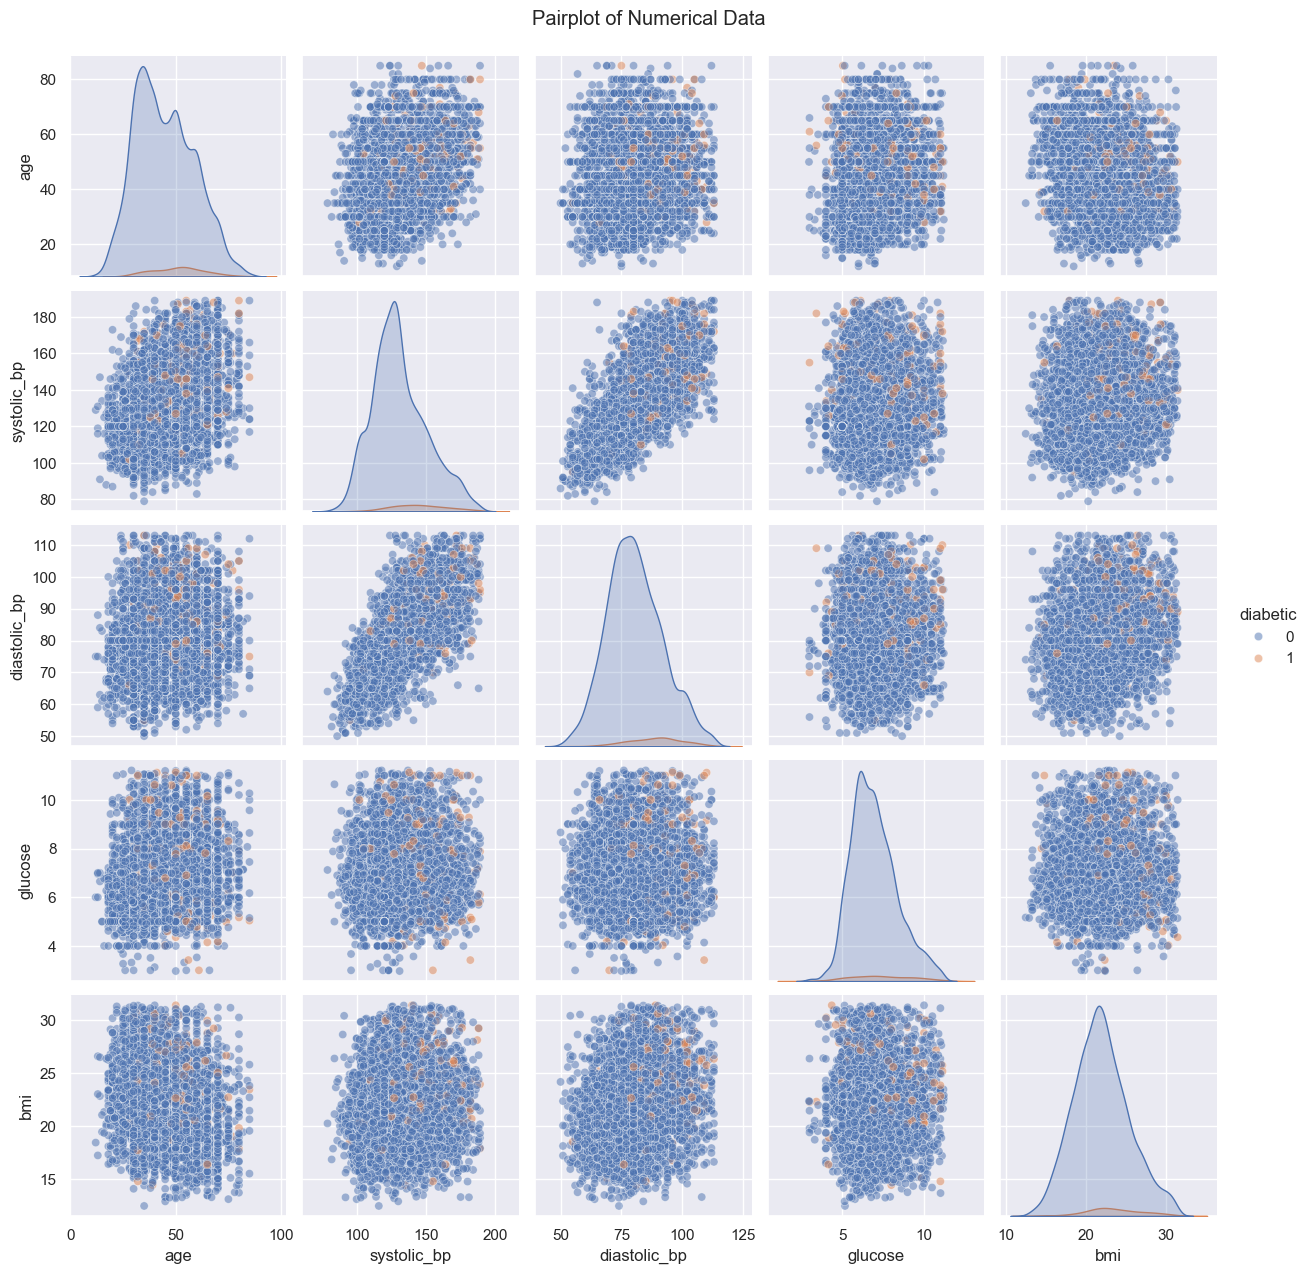

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Plot pairplot of numerical data
sns.pairplot(df_2.drop(['gender' ,'family_diabetes', 'hypertensive'], axis=1),
             diag_kind='kde',
             plot_kws={"alpha": 0.5}, 
             hue='diabetic')
plt.suptitle("Pairplot of Numerical Data", y=1.02)
plt.show()

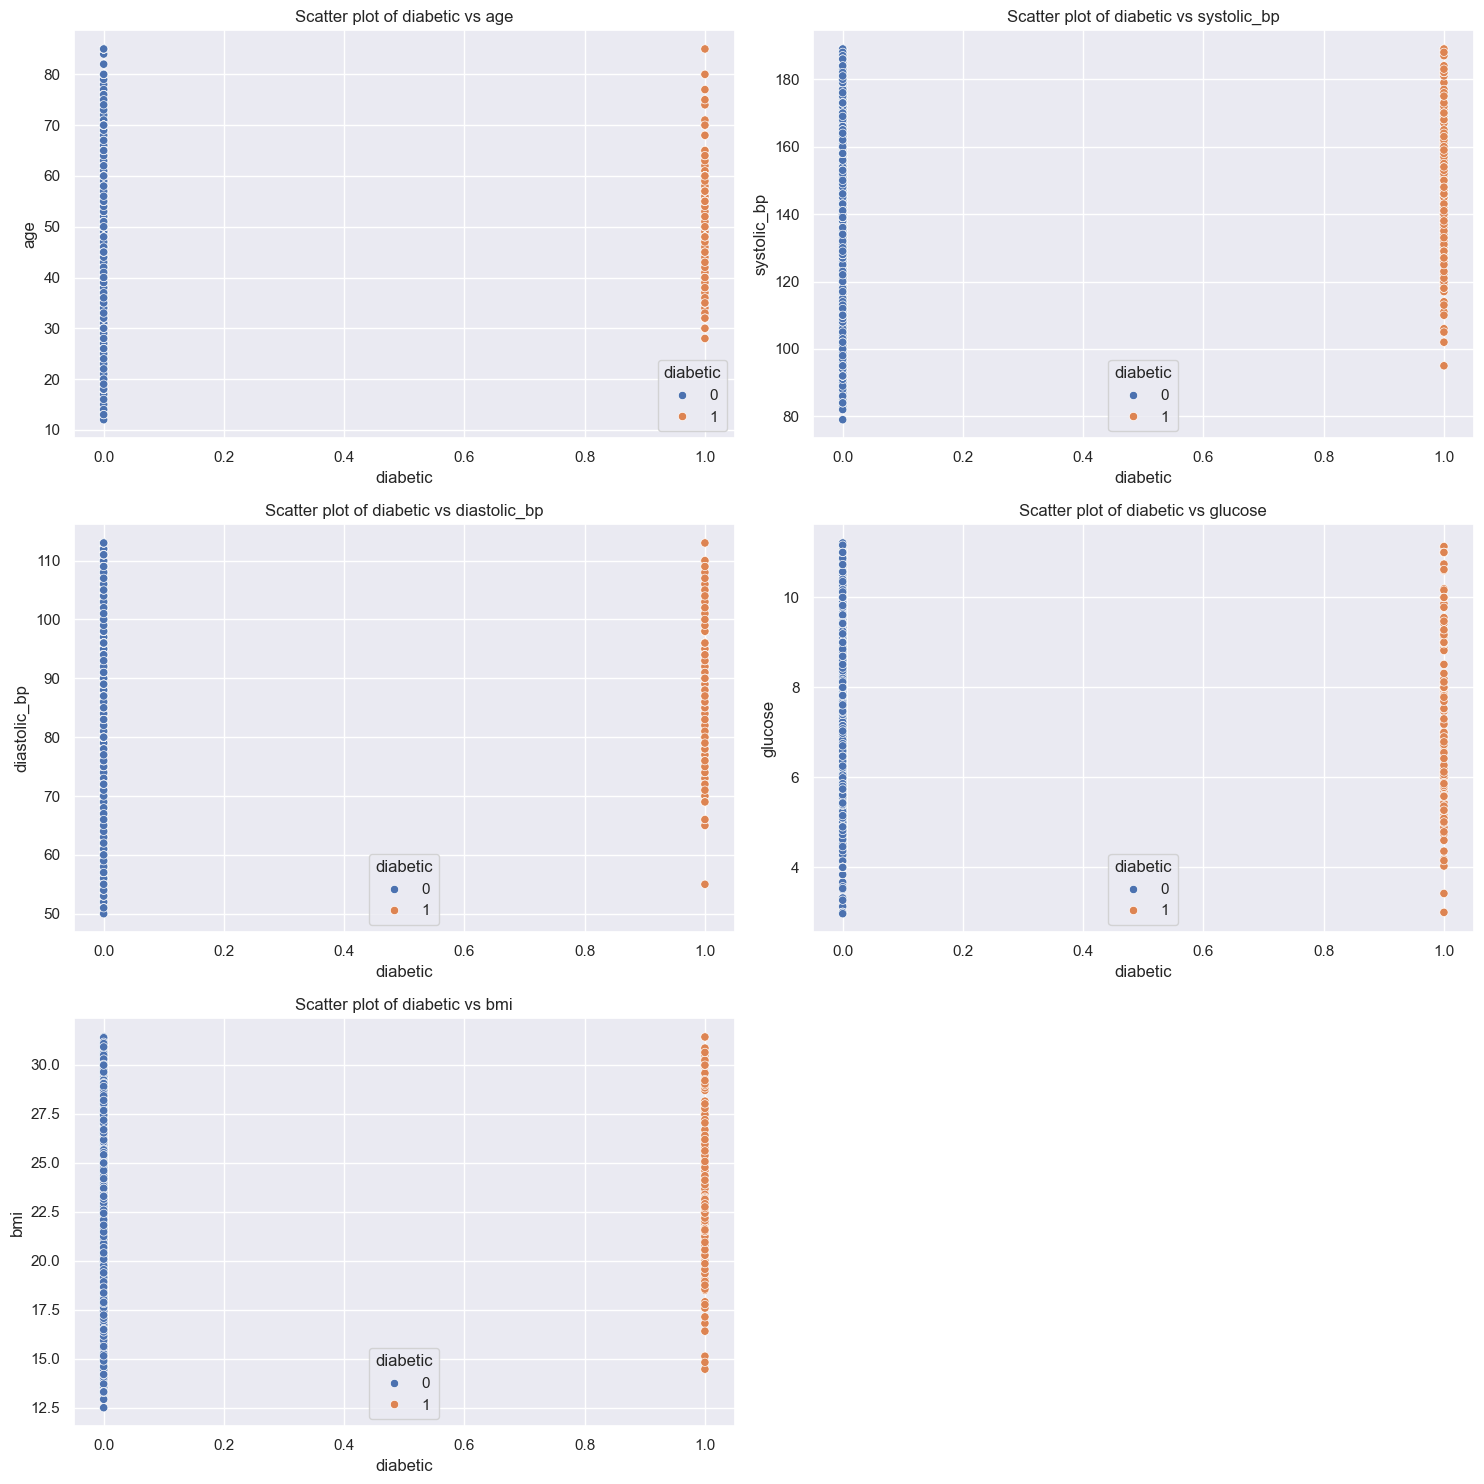

In [36]:
# function to plot scatter plot
def plot_scatter_with_target_hue_vertical(df: pd.DataFrame, cols: list, target: str) -> None:
    num_columns = len(cols)
    rows = (num_columns // 2) + (num_columns % 2 > 0)  # Arrange in 2 columns

    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot each numerical column against the target
    for i, column in enumerate(cols):
        sns.scatterplot(data=df, x=target, y=column, hue=target, ax=axes[i])
        axes[i].set_title(f"Scatter plot of {target} vs {column}")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_scatter_with_target_hue_vertical(df_2, ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi'], 'diabetic')

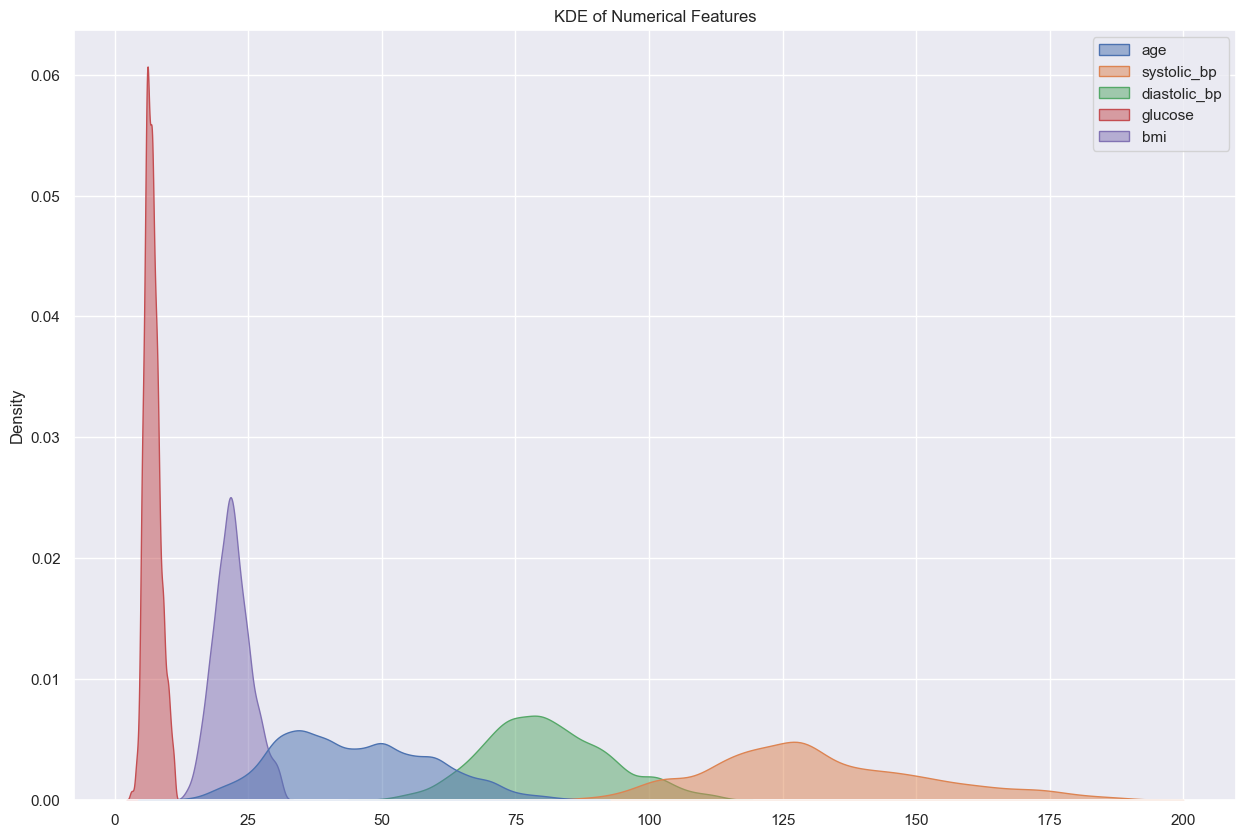

In [37]:
# Plot KDE of numerical features
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df_2[['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']], fill=True, alpha=0.5)
plt.title("KDE of Numerical Features")
plt.show()

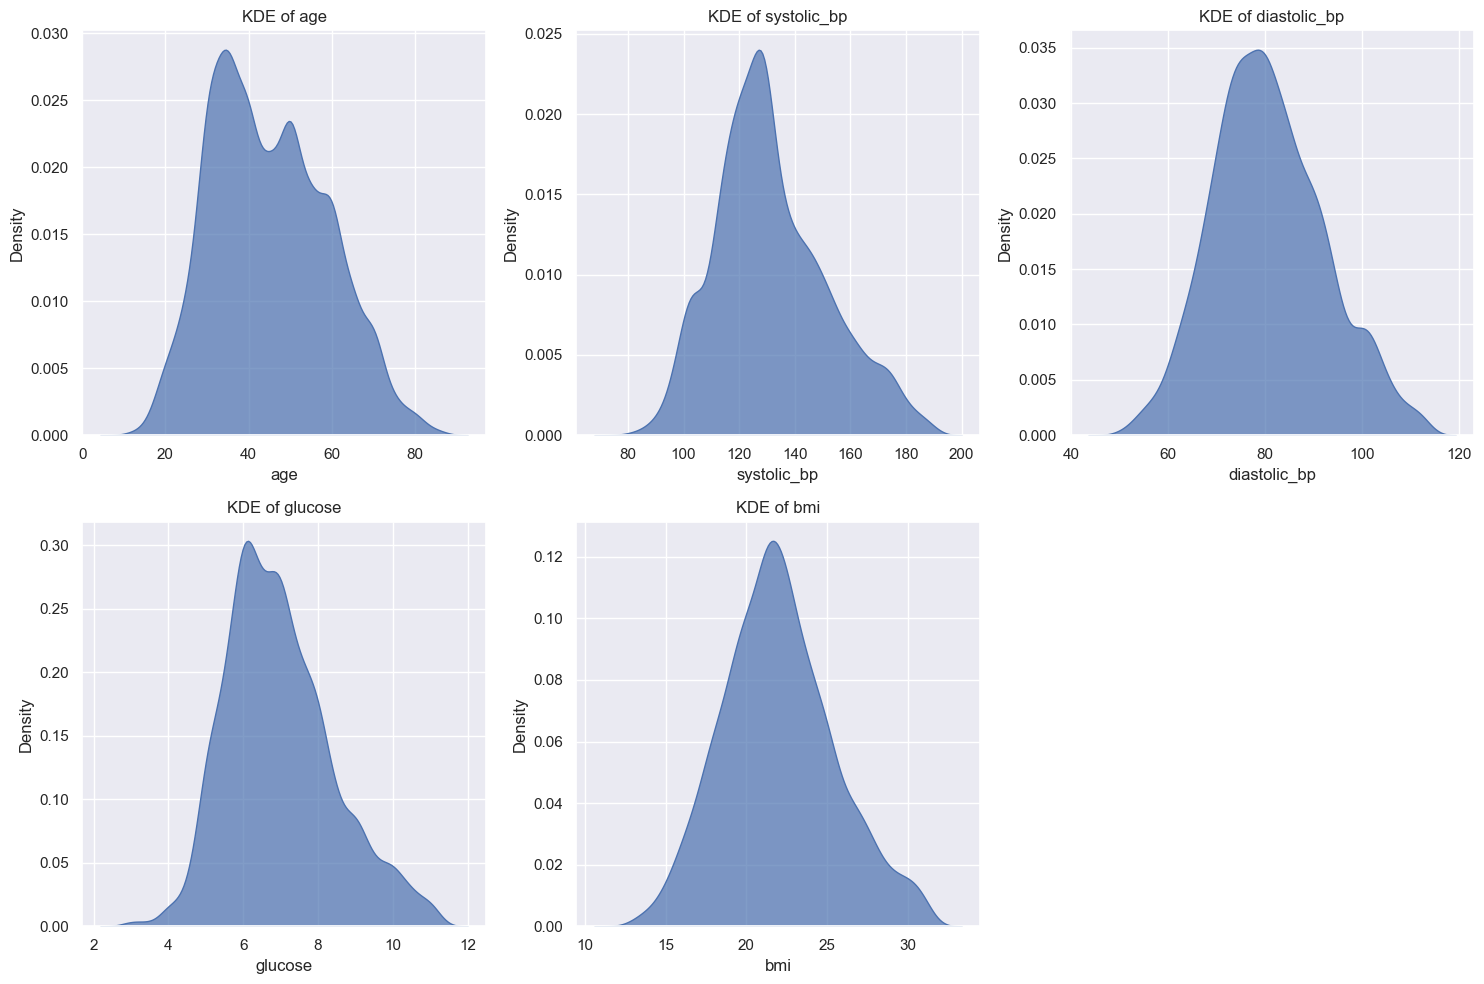

In [38]:
def plot_kde_subplots(df: pd.DataFrame, cols: list) -> None:
    num_columns = len(cols)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Arrange in 3 columns

    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot KDE for each feature
    for i, column in enumerate(cols):
        sns.kdeplot(data=df[column], fill=True, ax=axes[i], alpha=0.7)
        axes[i].set_title(f"KDE of {column}")
        axes[i].set_xlabel(column)

    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    # plt.title("Disttribution of Numerical Data")
    plt.tight_layout()
    plt.show()

plot_kde_subplots(df_2, ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi'])